# 6.6 Sourcing & Analyzing Time Series Data

### Included in this Notebook:

#### 1. Importing Libraries
#### 2. Importing Dataframe
#### 3. Subsetting, wrangling, and cleaning time-series data
#### 4. Creation of a line chart
#### 5. Time Series Analysis: Decomposition
#### 6. Testing for Stationarity with Dickey-Fuller Test
#### 7. Stationarizing Data
#### 8. Second round: Stationarizing the Data
#### 9. Autocorrelation Check

### 1. Importing Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [12]:
# Configure API key 

quandl.ApiConfig.api_key = 'hzxEkx6uEn8ny3hyxyZA'

### 2. Importing Dataframe

In [19]:
# Importing the Federal Reserve Economic Data "Natural Rate of Unemployment(short-term)"

data = quandl.get('FRED/NROUST')

In [21]:
data.head(5)

,Value
Date,
1949-01-01,5.255053
1949-04-01,5.261516
1949-07-01,5.268013
1949-10-01,5.274564
1950-01-01,5.281182


In [22]:
data.shape

(332, 1)

In [23]:
data.columns

Index(['Value'], dtype='object')

In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
data.info

<bound method DataFrame.info of                Value
Date                
1949-01-01  5.255053
1949-04-01  5.261516
1949-07-01  5.268013
1949-10-01  5.274564
1950-01-01  5.281182
...              ...
2030-10-01  4.294982
2031-01-01  4.289282
2031-04-01  4.283630
2031-07-01  4.278029
2031-10-01  4.272470

[332 rows x 1 columns]>

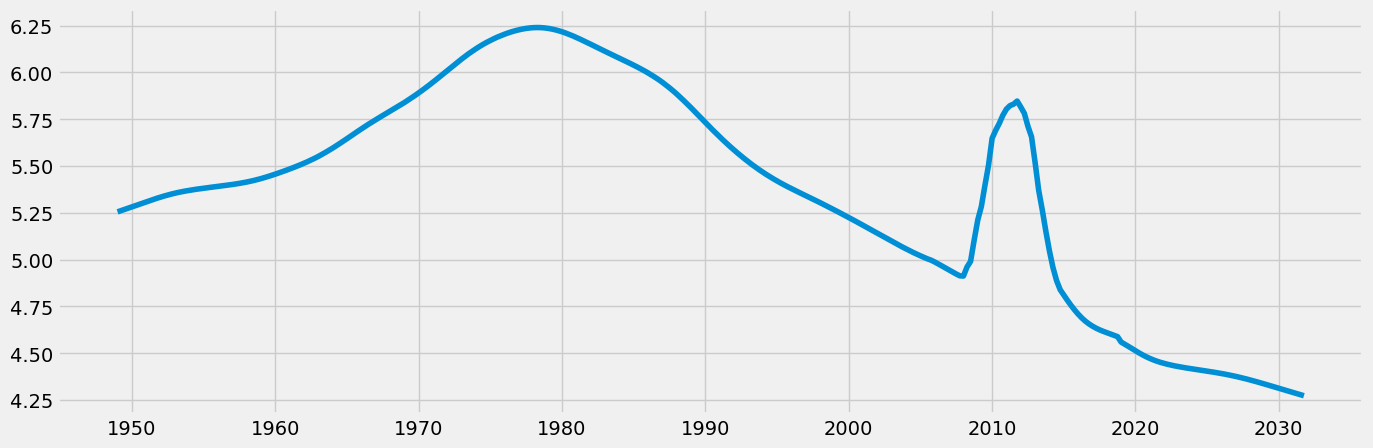

In [26]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

Observation: The unemployment rate displayed a steady decline from around 1979 until a sharp increase occurred between 2009 and 2011. Subsequently, it consistently decreased once again.

### 3. Subsetting, wrangling, and cleaning time-series data

In [27]:
# Reset index so to use the "Date" column as a filter

data_2 = data.reset_index()

In [28]:
data_2.head(5)

,Date,Value
0,1949-01-01,5.255053
1,1949-04-01,5.261516
2,1949-07-01,5.268013
3,1949-10-01,5.274564
4,1950-01-01,5.281182


##### Step 3a. Although the unemployment rate is not directly pertinent to the main project, the period between 2015 and 2023 is of interest. This period gains relevance due to the inclusion of Social Support in the main project, thereby making it a compelling timeframe to explore.

In [29]:
# Creating a subset of the data from the year 2015-2023
data_sub = data_2.loc[(data_2['Date'] >= '2015-01-01') & (data_2['Date'] < '2023-04-01')]

In [30]:
data_sub.shape

(33, 2)

In [31]:
data_sub.head()

,Date,Value
264,2015-01-01,4.810394
265,2015-04-01,4.782687
266,2015-07-01,4.756195
267,2015-10-01,4.731372
268,2016-01-01,4.708691


##### Step 3b Reset Date column as the index

In [32]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date".
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2015-01-01,4.810394
2015-04-01,4.782687
2015-07-01,4.756195
2015-10-01,4.731372
2016-01-01,4.708691


### 4. Create a line chart of your data

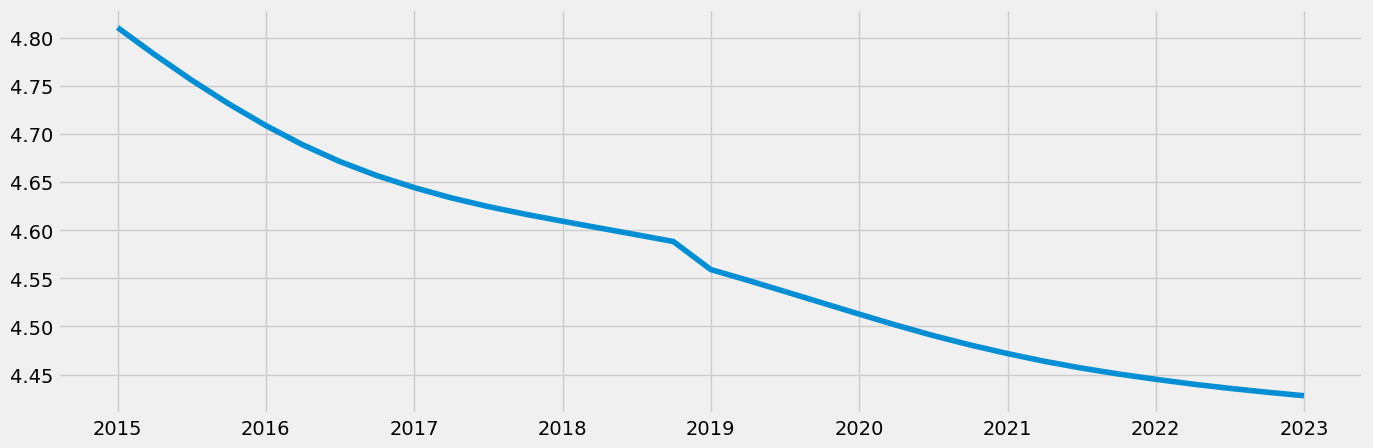

In [33]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

##### Observation: The unemployment rate has decreased constantly since 2015, with a steeper drop end of 2018

In [34]:
# Check for missing values
data_sub.isnull().sum()

Value    0
dtype: int64

In [36]:
# Check for duplicates
dups = data_sub.duplicated()
dups.sum()

# 0 dups

0

### 5. Time Series Analysis: Decomposition

In [37]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [38]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

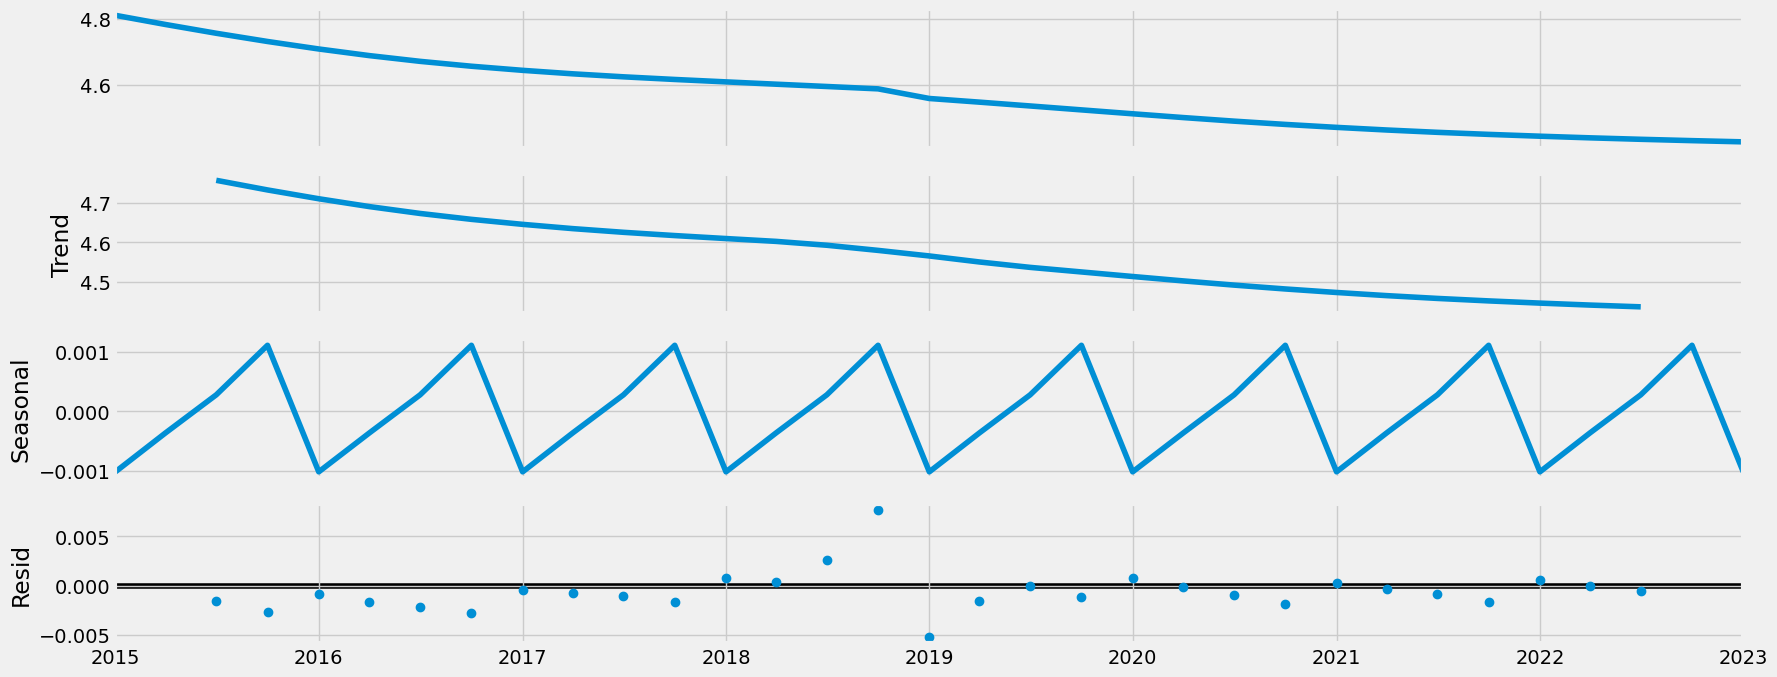

In [39]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Step 5b. Observation: The chart shows a steady decrease, continuing right up to the present year, indicating a strong overall downward trend. We also notice a pattern where the unemployment rate tends to rise at the beginning of each year and fall in autumn. Yet, there's some unpredictability in the data, causing occasional fluctuations or unexplained noise.

### 6. Testing for Stationarity by conducting a Dickey-Fuller test

In [40]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                -6.748716e+00
p-value                        2.988827e-09
Number of Lags Used            0.000000e+00
Number of Observations Used    3.200000e+01
Critical Value (1%)           -3.653520e+00
Critical Value (5%)           -2.957219e+00
Critical Value (10%)          -2.617588e+00
dtype: float64


##### Step 6b. Observation: The Dickey-Fuller test results indicate strong evidence supporting the stationarity of the data. The highly negative test statistic of approximately -6.75, significantly lower than the critical values at all significance levels (1%, 5%, and 10%), implies a rejection of the null hypothesis of non-stationarity. Additionally, the extremely low p-value of approximately 2.99e-09, much smaller than the common significance level of 0.05, further supports the conclusion favoring stationarity. Therefore, based on these test results, the data is likely to be stationary.

### 6b. Autocorrelation Check

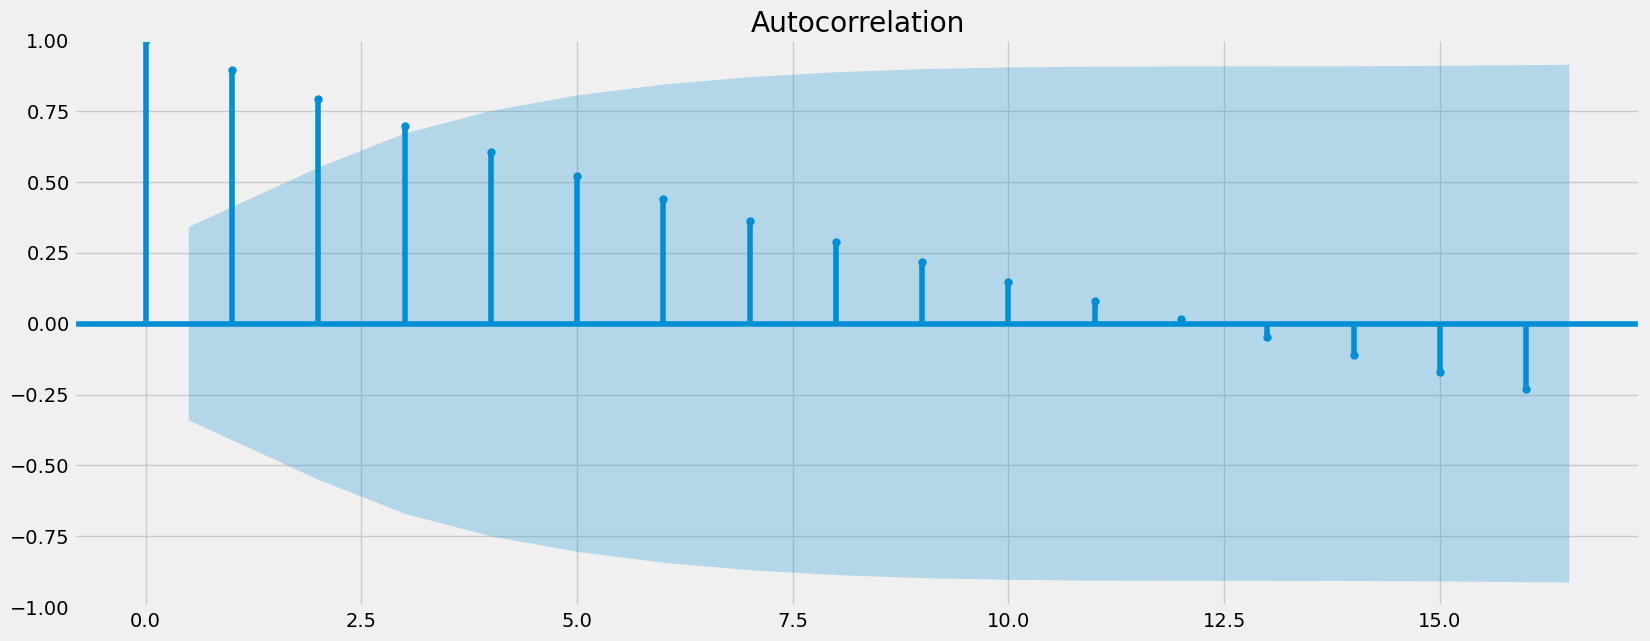

In [41]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub)
plt.show()

##### Observation: Since only a few lines extend beyond the upper limit of the blue confidence interval, it implies a minor degree of correlation among them. This suggests a likelihood of the data being stationary.

### 7. Stationarizing the Federal Reserve Economic Data

In [58]:
data_diff = data_sub - data_sub.shift(1) 

In [59]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [60]:
data_diff.head()

,Value
datetime,
2015-04-01,-0.027708
2015-07-01,-0.026492
2015-10-01,-0.024823
2016-01-01,-0.022681
2016-04-01,-0.020053


In [61]:
data_diff.columns

Index(['Value'], dtype='object')

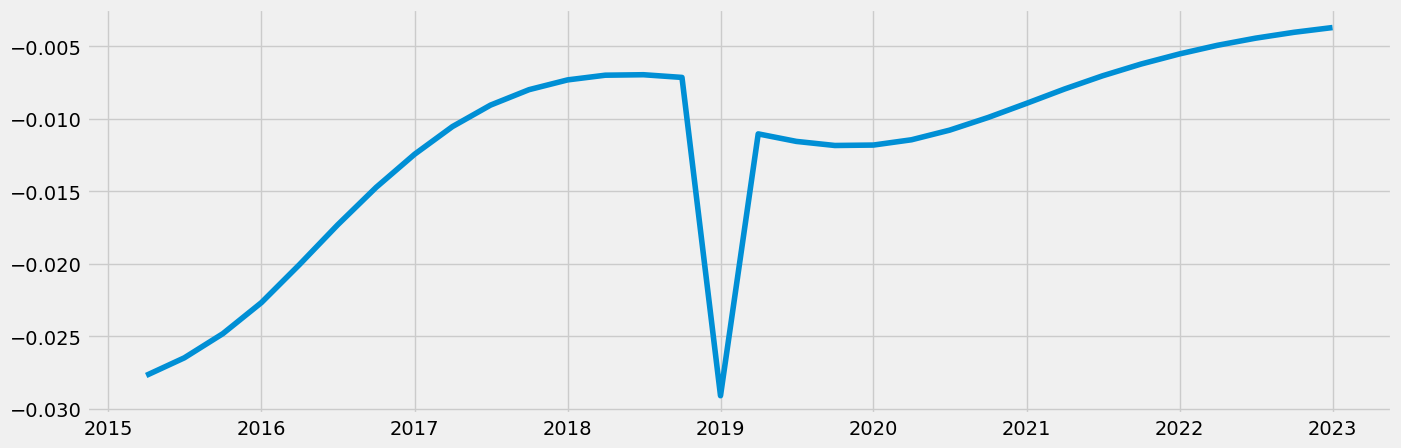

In [62]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [63]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.705022
p-value                         0.073173
Number of Lags Used             0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


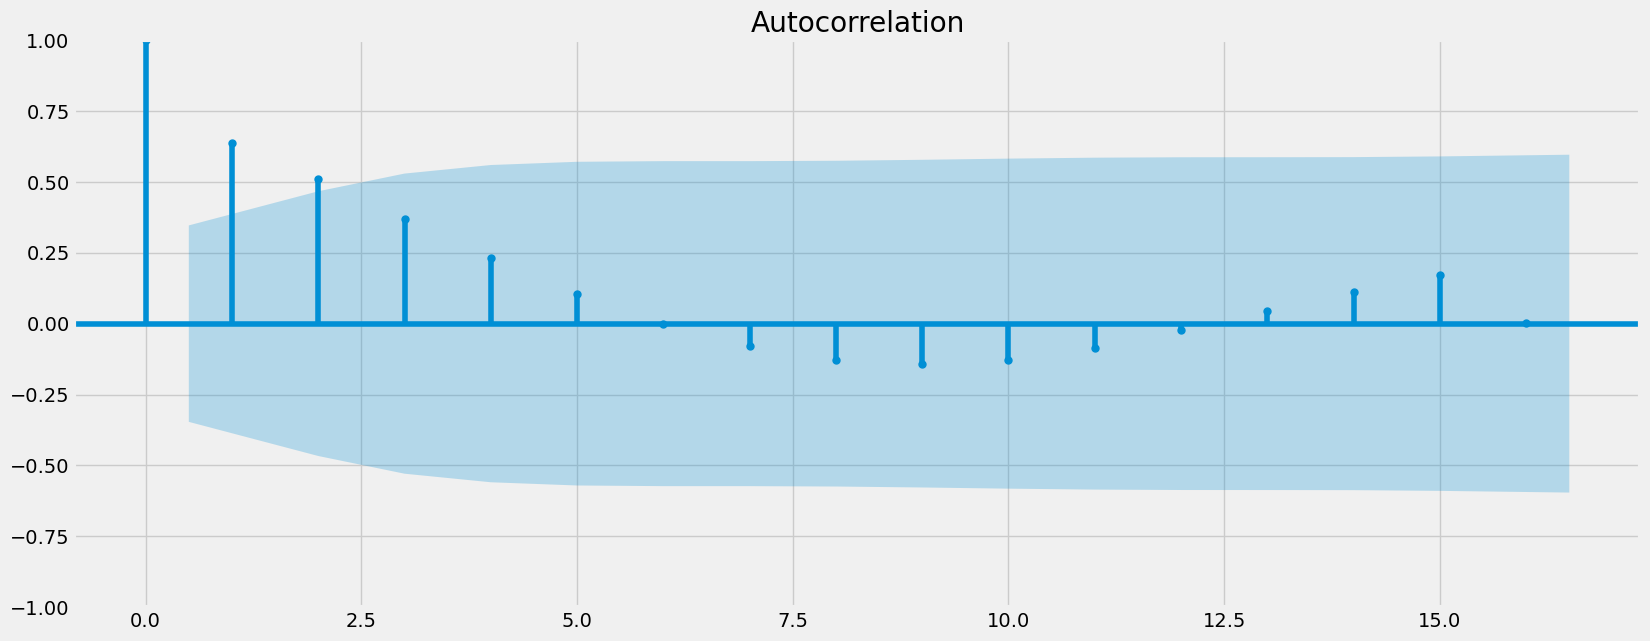

In [64]:
plot_acf(data_diff)
plt.show()

### 8. Second Round: Stationarizing Data

In [65]:
data_diff_2 = data_diff - data_diff.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t

In [66]:
data_diff_2.dropna(inplace = True)

In [67]:
data_diff_2.head()

,Value
datetime,
2015-07-01,0.001216
2015-10-01,0.001669
2016-01-01,0.002142
2016-04-01,0.002628
2016-07-01,0.002738


In [68]:
data_diff_2.columns

Index(['Value'], dtype='object')

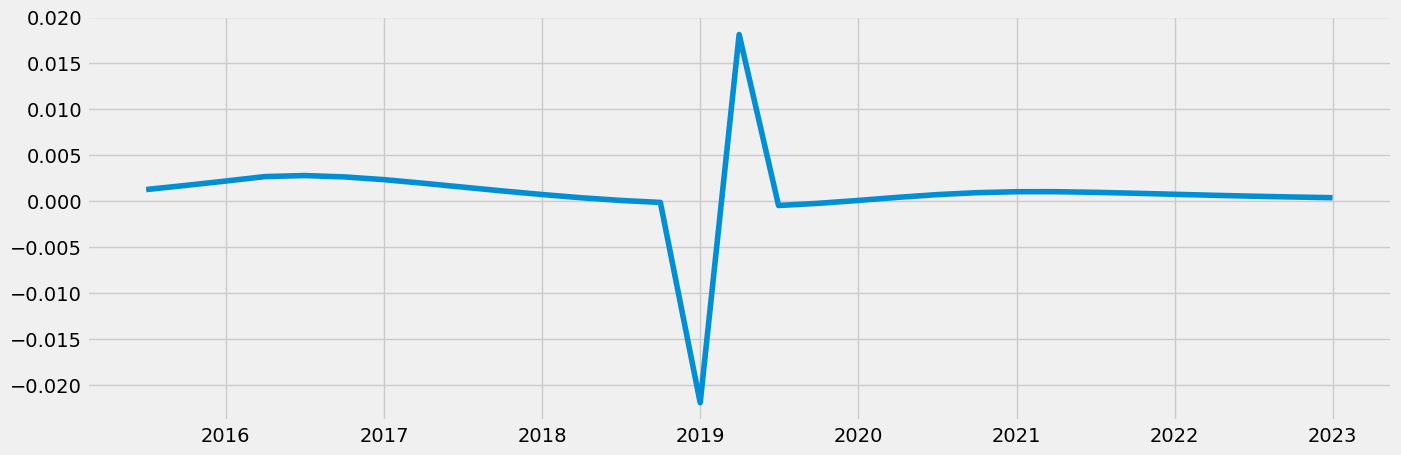

In [69]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff_2)

In [70]:
dickey_fuller(data_diff_2)

Dickey-Fuller Stationarity test:
Test Statistic                -8.531560e+00
p-value                        1.034356e-13
Number of Lags Used            0.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64


### 9. Autocorrelation Check

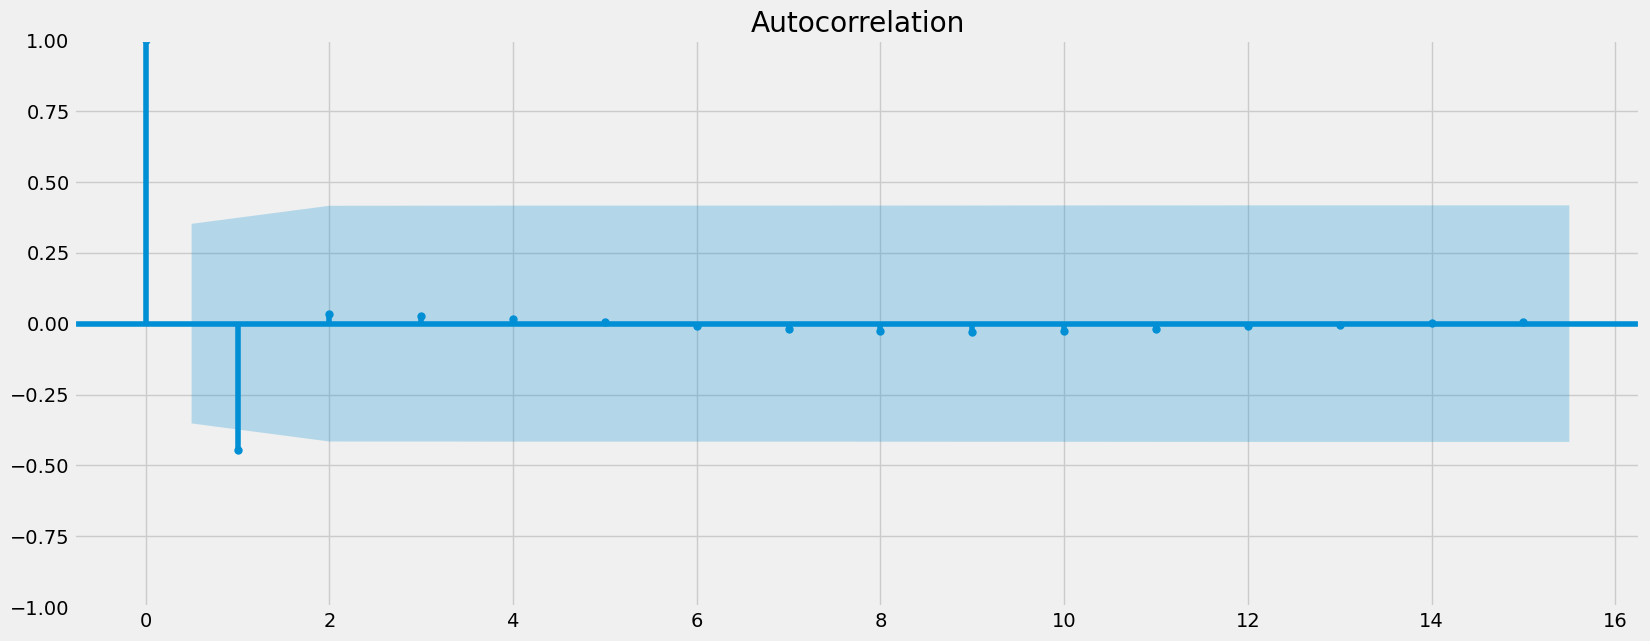

In [71]:
plot_acf(data_diff_2)
plt.show()